In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

In [2]:
import numpy as np

from ylearn.policy.policy_model import PolicyTree
from ylearn.utils._common import to_df
import matplotlib.pyplot as plt

In [7]:
v = np.random.normal(size=(1000, 10))
y = np.hstack([v[:, [0]] < 0, v[:, [0]] > 0])

data = to_df(v=v)
covariate = data.columns

In [8]:
est = PolicyTree(criterion='policy_reg')
est.fit(data=data, covariate=covariate, effect_array=y.astype(float))

06-02 11:59:02 I ylearn.p.policy_model.py 449 - Start building the policy tree with criterion PRegCriteria
06-02 11:59:02 I ylearn.p.policy_model.py 465 - Building the policy tree with splitter BestSplitter
06-02 11:59:02 I ylearn.p.policy_model.py 508 - Building the policy tree with builder DepthFirstTreeBuilder


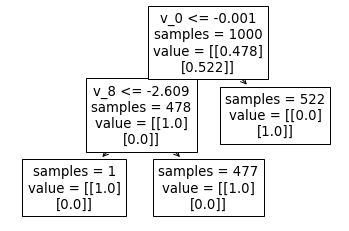

In [9]:
est.plot()
plt.show()

In [16]:
est.decision_path(v=v[1, :].reshape(1, -1))

<1x3 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [24]:
est.decision_path(data=data[:1])

<1x3 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [25]:
est1 = PolicyTree(criterion='policy_test')
est1.fit(data, covariate, effect_array=y)

05-31 11:31:23 I ylearn.p.policy_model.py 443 - Start building the causal tree with criterion MSE
05-31 11:31:23 I ylearn.p.policy_model.py 459 - Building the causal tree with splitter BestSplitter
05-31 11:31:23 I ylearn.p.policy_model.py 502 - Building the causal tree with builder DepthFirstTreeBuilder
node impurity
children impurity


In [26]:
est2 = PolicyTree(criterion='policy_test1')
est2.fit(data=data, covariate=covariate, effect_array=y)

05-31 11:31:28 I ylearn.p.policy_model.py 443 - Start building the causal tree with criterion PRegCriteria1
05-31 11:31:28 I ylearn.p.policy_model.py 459 - Building the causal tree with splitter BestSplitter
05-31 11:31:28 I ylearn.p.policy_model.py 502 - Building the causal tree with builder DepthFirstTreeBuilder
